In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

In [ ]:
def sliding_window(x, w = 1, d = 0):
    N = len(x)
    m = int(np.ceil((N-w)/(w-d)) + 1)
    X = np.zeros([w,m])
    for i,j in zip(range(0,N,w-d),range(0,m)):
        X[:,j] = x[i:i + w]
    return X

The signal to be predicted is the function
$f(t)=\cos(t)+\sin(t/2)$
 with sample time $T=0.1$, corrupted with white noise.

In [ ]:

N=501
b=0
sigma=0.1
t = np.linspace(start=0, stop=(N-1)/10, num=N).reshape(-1, )
x = np.cos(t)+np.sin(t/2.3)+b+sigma*np.random.randn(N)

delta_t=0.1 #this is the time increments, given the definition of the time sequence.


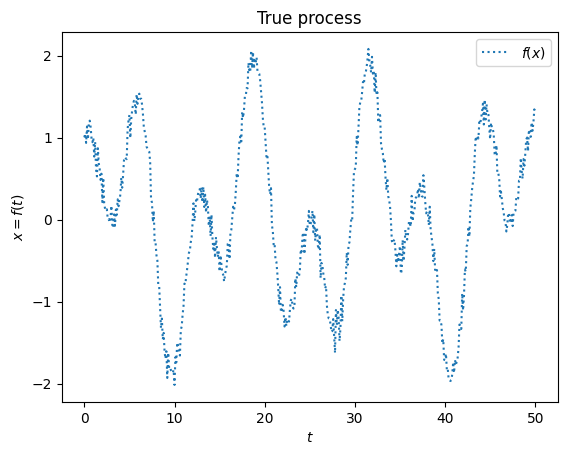

In [ ]:
plt.plot(t, x, label=r"$f(x) $", linestyle="dotted")
plt.legend()
plt.xlabel("$t$")
plt.ylabel("$x=f(t)$")
plt.title("True process")
plt.show()

The training and test data are generated here. We construct a sliding window of length $W$ with a sliding step $\Delta T=1$ for the predictors. We mean to predict at a time horizon $M$, and the length of the signal is $N$. Therefore, the training predictors range from $n=0$ to $n=N-M$, and the regressors range from $n=M$ to $n=N$.

The sliding window time is 1.0 seconds, and it contains 0.15915494309189535 periods.
The prediction horizon is 1.0 seconds.
(181, 10)
(181,)
(282, 10)
(282,)
(181,)
(282,)


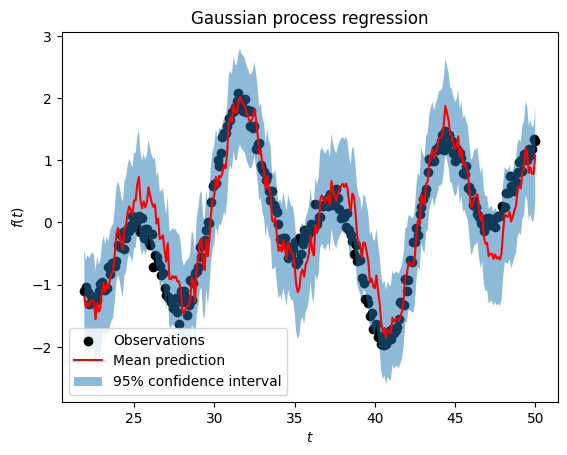

In [ ]:
N_train=200
W=10
M=10

print("The sliding window time is "+str(delta_t*W)+" seconds, and it contains "+ str(delta_t*W/2/np.pi)+" periods.")
print("The prediction horizon is "+str(delta_t*M)+" seconds.")

x_train=x[:N_train]
t_train=t[M+W-1:N_train]
x_test=x[N_train:]
t_test=t[N_train+M+W-1:]

X_train=sliding_window(x_train[:-M],W,W-1).T
y_train=x_train[M+W-1:]

X_test=sliding_window(x_test[:-M],W,W-1).T
y_test=x_test[M+W-1:]
delta_t*W
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(t_train.shape)
print(t_test.shape)

kernel = 1*DotProduct(0.1) + WhiteKernel(0.1)

gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

mean_prediction, std_prediction = gaussian_process.predict(X_test, return_std=True)
plt.scatter(t_test, y_test, label="Observations",color="black")
plt.plot(t_test, mean_prediction, label="Mean prediction",color="red")
plt.fill_between(
    t_test.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$t$")
plt.ylabel("$f(t)$")
plt.title("Gaussian process regression")
plt.show()

In [ ]:
#This is a test of how the sliding window works

z=np.arange(20)
W=5
M=1
Z=sliding_window(z[:-M],W,W-1)
y=z[M+W-1:]
print(Z)
print(y)
print(Z.shape)
print(y.shape)

[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
 [ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]
 [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.]
 [ 4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.]]
[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
(5, 15)
(15,)


In [ ]:
z[10:]

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])